<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/12%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# pd.Timestamp = datetime + dateutil( 시점) > inner : numpy datetime64 활용
# 빠르고 활용 쉬움

# numpy를 상속 아니로 차용

In [2]:
pd.Timestamp.__bases__

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
import datetime

In [4]:
issubclass(pd.Timestamp, datetime.datetime)

True

In [5]:
import numpy as np

In [6]:
issubclass(pd.Timestamp, np.datetime64)

False

In [7]:
pd.Timestamp(2023, 7, 9)

Timestamp('2023-07-09 00:00:00')

#pandas timestamp는 datetime형인데
기능 추가된 것

In [9]:
import dateutil

In [10]:
dateutil.parser.parse('2023-07-09')

datetime.datetime(2023, 7, 9, 0, 0)

In [11]:
##datetime.datetime('2023-07-09') 에러

In [12]:
datetime.datetime.strptime('2023-07-09', '%Y-%m-%d')

datetime.datetime(2023, 7, 9, 0, 0)

In [13]:
pd.Timestamp('sep 4, 2023')

Timestamp('2023-09-04 00:00:00')

In [14]:
pd.Timestamp(5000)

Timestamp('1970-01-01 00:00:00.000005')

In [15]:
a = pd.Timestamp('sep 4, 2023')

In [16]:
a.year

2023

In [17]:
a.day_name()

'Monday'

In [18]:
a.month_name()

'September'

#pd.Period(기간)

In [27]:
b = pd.Period('2023')   #annual, december까지

In [ ]:
#a + pd.Period('2023')

In [50]:
b + 5

Period('2028', 'A-DEC')

In [24]:
issubclass(pd.Period, datetime.timedelta)

False

In [28]:
b.start_time

Timestamp('2023-01-01 00:00:00')

In [29]:
b.end_time

Timestamp('2023-12-31 23:59:59.999999999')

In [30]:
c = pd.Period('2023-01')

In [31]:
c

Period('2023-01', 'M')

In [32]:
c.start_time

Timestamp('2023-01-01 00:00:00')

In [33]:
c.end_time

Timestamp('2023-01-31 23:59:59.999999999')

In [34]:
d = pd.Period('2023-01-03')

In [35]:
d.start_time

Timestamp('2023-01-03 00:00:00')

In [36]:
d.end_time

Timestamp('2023-01-03 23:59:59.999999999')

In [37]:
pd.Period('2023', freq='M')

Period('2023-01', 'M')

In [43]:
e = pd.Period('2023', freq='M')

In [40]:
e.start_time

Timestamp('2023-01-01 00:00:00')

In [41]:
e.end_time

Timestamp('2023-01-31 23:59:59.999999999')

In [ ]:
# e.end_time + 3  error

In [44]:
f = pd.Period('2023', freq='D')

In [45]:
f

Period('2023-01-01', 'D')

In [49]:
f+1

Period('2023-01-02', 'D')

In [46]:
g = pd.Period('2023', freq='H')

In [47]:
g

Period('2023-01-01 00:00', 'H')

In [48]:
g+1

Period('2023-01-01 01:00', 'H')

In [52]:
g + pd.offsets.Hour(3)

Period('2023-01-01 03:00', 'H')

In [53]:
g - pd.offsets.Hour(3)

Period('2022-12-31 21:00', 'H')

In [58]:
h = pd.Period('2023', freq='1Q')

In [59]:
h.start_time

Timestamp('2023-01-01 00:00:00')

In [60]:
h.end_time

Timestamp('2023-03-31 23:59:59.999999999')

#

range
np.arange
pd.date_range

In [82]:
x = pd.date_range('2021', '2023', freq='BM')   #Business Month

In [83]:
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [84]:
type(x).__bases__

(pandas.core.indexes.datetimelike.DatetimeTimedeltaMixin,)

In [85]:
issubclass(type(x), np.datetime64)

False

In [71]:
pd.date_range('2021', periods=3, freq='YS')

DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01'], dtype='datetime64[ns]', freq='AS-JAN')

In [72]:
x = pd.date_range('2021','2023', freq='BM')

In [73]:
data = pd.DataFrame(x, columns=['day'])

In [74]:
data['value'] = data.day.map(lambda x: np.random.rand())

In [75]:
data.set_index('day', inplace=True)

In [76]:
data

,value
day,
2021-01-29,0.416541
2021-02-26,0.642020
2021-03-31,0.504482
2021-04-30,0.027826
2021-05-31,0.442657
2021-06-30,0.007403
2021-07-30,0.539373
2021-08-31,0.497845
2021-09-30,0.224552


# 시간 날짜별로 어떠한 변화가 있는지 분석하는 것 => 시계열 분석

<Axes: xlabel='day'>

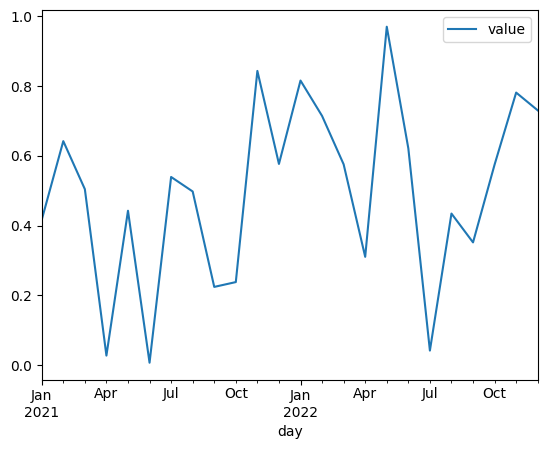

In [77]:
data.plot.line()

In [78]:
data['2021-01':'2021-08']

,value
day,
2021-01-29,0.416541
2021-02-26,0.642020
2021-03-31,0.504482
2021-04-30,0.027826
2021-05-31,0.442657
2021-06-30,0.007403
2021-07-30,0.539373
2021-08-31,0.497845


In [80]:
data.resample('Y').mean()

,value
day,
2021-12-31,0.413403
2022-12-31,0.576829


In [81]:
import seaborn as sns

In [86]:
tips = sns.load_dataset('tips')

In [87]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#

In [90]:
x = np.array('2023-07-09', dtype=np.datetime64)

In [91]:
x

array('2023-07-09', dtype='datetime64[D]')

In [93]:
x + np.arange(10)

array(['2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
       '2023-07-13', '2023-07-14', '2023-07-15', '2023-07-16',
       '2023-07-17', '2023-07-18'], dtype='datetime64[D]')

In [94]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
np.datetime64('2023-07-09')

numpy.datetime64('2023-07-09')

In [96]:
np.datetime64('2023-07-09 15:00')

numpy.datetime64('2023-07-09T15:00')

In [97]:
np.datetime64('2023-07-09 15:00', 'ns')

numpy.datetime64('2023-07-09T15:00:00.000000000')

In [98]:
u = np.array(['2023-07-09','2023-07-10'], dtype=np.datetime64)

In [99]:
u + 3

array(['2023-07-12', '2023-07-13'], dtype='datetime64[D]')

In [100]:
u + np.arange(2)

array(['2023-07-09', '2023-07-11'], dtype='datetime64[D]')

In [101]:
u

array(['2023-07-09', '2023-07-10'], dtype='datetime64[D]')

In [102]:
u[0]

numpy.datetime64('2023-07-09')